<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as Gridspec
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np
import os
import re
import warnings
from tqdm.notebook import tqdm
from pathlib import Path
warnings.filterwarnings("ignore")

In [2]:
d = 16 * 10**(-3)
S = np.pi/4 * d**2
'''
l = {
    '0%': 66 * 10**(-6),
    '0,05%': 60 * 10**(-6),
    '0,1%': 65 * 10**(-6),
    '0,2%': 60 * 10**(-6),
    '0,3%': 63 * 10**(-6),
    '0,4%': 70 * 10**(-6),
    '0,5%': 59 * 10**(-6)
    
}
'''
l = {
    '0%': 1,
    '0,05%': 1,
    '0,1%': 1,
    '0,2%': 1,
    '0,3%': 1,
    '0,4%': 1,
    '0,5%': 1
}
p = 10**3
lower_pressure = 60
upper_pressure = 80
directory = Path(r'C:\Users\gizza\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\salt')
graph_directory = Path(r'C:\Users\gizza\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\salt')

plt.rcParams.update({
    # Основные параметры шрифтов
    'font.size': 20,            # Размер основного текста
    'axes.titlesize': 18,       # Размер заголовка
    'axes.labelsize': 16,       # Размер подписей осей
    'xtick.labelsize': 12,      # Размер подписей по оси X
    'ytick.labelsize': 12,      # Размер подписей по оси Y
    'legend.fontsize': 14,      # Размер текста легенды
    'figure.titlesize': 16,     # Размер заголовка фигуры
    
    # Параметры сетки
    'axes.grid': True,          # Включить сетку
    'grid.linestyle': '--',     # Стиль линии (пунктирная)
    'grid.alpha': 0.6,          # Прозрачность сетки (60%)
    'grid.color': 'gray',       # Цвет сетки
    'grid.linewidth': 0.8,      # Толщина линий сетки
    'axes.axisbelow': True      # Сетка под графиками
})

In [3]:
#folders = ['0%', '0,05%', '0,1%', '0,2%', '0,3%', '0,4%', '0,5%']
folders = ['0%', '0,1%', '0,2%', '0,3%', '0,4%', '0,5%']
directories = {}
for folder in folders:
    (directory / folder).mkdir(exist_ok=True)
    directories[folder] = (directory / folder)

In [4]:
def preprocessing(directory):
    # Проходим по всем файлам в папке
    for filename in os.listdir(directory):
        if filename.startswith('обработанные'):
            print(directory)
            print("Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.")
            return  # Завершение функции, если такие файлы найдены
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):  # Проверяем, что файл имеет расширение .txt
            input_file = os.path.join(directory, filename)  # Полный путь к входному файлу
            output_file = os.path.join(directory, f'обработанные_{filename}')  # Полный путь к выходному файлу

            # Чтение содержимого файла
            with open(input_file, 'r', encoding='utf-8') as file:
                lines = file.readlines()

            # Удаление первых 19 строк
            filtered_lines = lines[19:]

            # Запись отфильтрованных строк в новый файл
            with open(output_file, 'w', encoding='utf-8') as file:
                file.writelines(filtered_lines)
    print(directory)
    print("Обработка завершена.")


In [5]:
#folders = ['0%', '0,05%', '0,1%', '0,2%', '0,3%', '0,4%', '0,5%']
folders = ['0%', '0,1%', '0,2%', '0,3%', '0,4%', '0,5%']
directories = {}
for folder in folders:
    (directory / folder).mkdir(exist_ok=True)
    directories[folder] = (directory / folder)

In [6]:
def dataframe_load(directory):
    dataframes = []
    file_list = []  # список для хранения (давление, путь_к_файлу)

    for filename in os.listdir(directory):
        if filename.startswith("обработанные_PSF_") and filename.endswith(".csv"):
            # Ищем число перед 'atm' (например, 23 из 'обработанные_PSF_0%_20%_23atm.csv')
            match = re.search(r'(\d+)atm\.csv$', filename)
            if match:
                pressure = int(match.group(1))  # извлекаем число
                file_list.append((pressure, filename))
            else:
                print(f"⚠ Файл {filename} не содержит давления в формате 'числоatm.csv'")
                continue

    # Сортируем файлы по давлению (от меньшего к большему)
    file_list.sort(key=lambda x: x[0])

    # Загружаем DataFrame'ы в правильном порядке
    for pressure, filename in file_list:
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, sep=' ', encoding='utf-8')  # или другой разделитель
        dataframes.append(df)
        print(f"Загружен файл {filename} (давление: {pressure} атм)")

    print(f"\n✅ Всего загружено {len(dataframes)} файлов.")
    print(f"Порядок обработки: {[p for p, _ in file_list]} атм")
    return dataframes

In [7]:
dataframes = {}
for folder in directories:
    preprocessing(directories[folder])  # Выполнение предварительной обработки
    df_list = dataframe_load(directories[folder])  # Загрузка DataFrame

    # Формирование имени переменной
    variable_name = 'df_' + '_'.join(folder.replace(',', '_').replace('%', '').split())
    # Сохраняем в глобальную переменную
    globals()[variable_name] = df_list
    print(f'{variable_name} загружен с {len(df_list)} DataFrames')
    dataframes[folder] = df_list

C:\Users\gizza\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\salt\0%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Загружен файл обработанные_PSF_0%_20%_83atm.csv (давление: 83 атм)

✅ Всего загружено 1 файлов.
Порядок обработки: [83] атм
df_0 загружен с 1 DataFrames
C:\Users\gizza\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\salt\0,1%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Загружен файл обработанные_PSF_0,1%_20%_83atm.csv (давление: 83 атм)

✅ Всего загружено 1 файлов.
Порядок обработки: [83] атм
df_0_1 загружен с 1 DataFrames
C:\Users\gizza\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\salt\0,2%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Загружен файл обработанные_PSF_0,2%_20%_83atm.csv (давление: 83 атм)

✅ Всего загружено 1 файлов.
Порядок обработки: [83] атм
df_0_2 загружен с 1 DataFrames
C:\Users\gizza\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\salt\0,3%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Загружен фа

In [8]:
for concentration in dataframes:
    for i, df in enumerate(dataframes[concentration]):
        df['position_mm_relative'] = df['position_mm_relative'] * (np.pi * 8**2) / 10**3

In [9]:
dataframes_approximation = {}
for item in dataframes:
    df_list = []
    df_ = dataframes[item]
    
    for i, df_item in enumerate(df_):
        current_lower = lower_pressure + 5 * i
        current_upper = upper_pressure + 10 * i
        df = df_item.loc[(current_lower <= df_item['pressure_Atm']) & (df_item['pressure_Atm'] <= current_upper)]
        max_index = df['pressure_Atm'].idxmax()
        
        # Разделяем данные на две части
        df_charge = df.loc[:max_index]
        #df_charge = df_charge[(current_lower <= df_charge['pressure_Atm']) & (df_charge['pressure_Atm'] <= current_upper)]
        df_uncharge = df.loc[max_index:]
        #df_uncharge = df_uncharge[(current_lower <= df_uncharge['pressure_Atm']) & (df_uncharge['pressure_Atm'] <= current_upper)]
        

        # Полиномиальная регрессия для df_charge (2-й степени)
        coefficients_charge = np.polyfit(df_charge['pressure_Atm'], df_charge['position_mm_relative'], 1)
        polynomial_charge = np.poly1d(coefficients_charge)

        # Добавляем результаты для df_charge в DataFrame
        df.loc[:max_index, 'approximation_polynomial_charge'] = polynomial_charge(df_charge['pressure_Atm'])

        # Полиномиальная регрессия для df_uncharge (2-й степени)
        coefficients_uncharge = np.polyfit(df_uncharge['pressure_Atm'], df_uncharge['position_mm_relative'], 1)
        polynomial_uncharge = np.poly1d(coefficients_uncharge)

        # Добавляем результаты для df_uncharge в DataFrame
        df.loc[max_index:, 'approximation_polynomial_uncharge'] = polynomial_uncharge(df_uncharge['pressure_Atm'])

        # Формируем общий столбец с результатами для всей таблицы
        df['approximation_polynomial'] = (df['approximation_polynomial_charge']
                                          .combine_first(df['approximation_polynomial_uncharge']))
        
        df_list.append(df.reset_index(drop=True))
        
        
    print('Обработка завершена')
    dataframes_approximation[item] = df_list

Обработка завершена
Обработка завершена
Обработка завершена
Обработка завершена
Обработка завершена
Обработка завершена


In [10]:
J_df = {}
for item in dataframes_approximation:
    df_list = []
    df_item = dataframes_approximation[item]
    for i, df in enumerate(df_item):
        
        current_lower = lower_pressure + 5 * i
        current_upper = upper_pressure + 10 * i
        
        target_values = np.arange(current_lower + 1, current_upper, 1)
        result_data = []
        temp = pd.DataFrame(columns=['pressure_Atm', 'time_diff', 'J', 'V_1', 'V_2', 't_1', 't_2', 'P_1', 'P_2'])
        for target_value in target_values:
            charge_differences = []
            uncharge_differences = []
            charge_differences = abs(df[df['approximation_polynomial_charge'].notna()]['pressure_Atm'] - target_value)
            charge_index = charge_differences.idxmin()

            uncharge_differences = abs(df[df['approximation_polynomial_uncharge'].notna()]['pressure_Atm'] - target_value)
            uncharge_index = uncharge_differences.idxmin()

            time_diff = abs(df.iloc[charge_index]['time'] - df.iloc[uncharge_index]['time']) / 1000
            volume_diff = abs(df.iloc[charge_index]['approximation_polynomial'] - 
                              df.iloc[uncharge_index]['approximation_polynomial'])
            new_row = {
                'pressure_Atm': target_value,
                'time_diff': time_diff,
                'J': volume_diff / time_diff,
                'V_1': df.iloc[charge_index]['approximation_polynomial'],  # или любое другое значение
                'V_2': df.iloc[uncharge_index]['approximation_polynomial'], # или любое другое значение
                
                't_1': df.iloc[charge_index]['time'] ,  # или любое другое значение
                't_2': df.iloc[uncharge_index]['time'], # или любое другое значение
                
                'P_1': df.iloc[charge_index]['pressure_Atm'],  # или любое другое значение
                'P_2': df.iloc[uncharge_index]['pressure_Atm'],  # или любое другое значение
                
                'charge_index': charge_index,
                'uncharge_index': uncharge_index
            }
            result_data.append(new_row)
        temp = pd.DataFrame(result_data)
        df_list.append(temp)
    J_df[item] = df_list

In [11]:
K_P_values = {}
for item in J_df:    
    df_list = J_df[item]
    current_list = []
    for i, df in enumerate(df_list):
        K = []
        P = []
        for j in range(len(df)):
            if j + 8 >= len(df):  # Проверка, чтобы не выйти за границы
                break
            else:
                # Убедимся, что индексы существуют
                if j not in df.index or j + 8 not in df.index:
                    continue
                    
                df1 = df[df['pressure_Atm'] == df.loc[j, 'pressure_Atm']]
                df2 = df[df['pressure_Atm'] == df.loc[j + 8, 'pressure_Atm']]

                delta_V1 = df1['V_2'].values - df1['V_1'].values
                delta_V2 = df2['V_2'].values - df2['V_1'].values
                
                delta_t = (df1['t_2'].values - df2['t_2'].values) / 10**(3)
                P_ = ((df2['pressure_Atm'].values + df1['pressure_Atm'].values)) / 2

                delta_V = (delta_V1 - delta_V2) * 10**(-6)
                K_ = (p * delta_V) / (delta_t * S * P_ * 101325)
                K.append(K_[0])  # Берём первый элемент массива
                P.append(P_[0])  # Берём первый элемент массива
            
        current_df = pd.DataFrame({'K': K, 'P': P})  # Создаём DataFrame без списков
        current_list.append(current_df)

    K_P_values[item] = current_list

In [12]:
K_P_values['0%'][0]

,K,P
0,1.058882e-08,65.0
1,1.282833e-08,66.0
2,1.050452e-08,67.0
3,1.272546e-08,68.0
4,1.044868e-08,69.0
5,1.128854e-08,70.0
6,1.372316e-08,71.0
7,1.121113e-08,72.0
8,1.353674e-08,73.0
9,1.108380e-08,74.0


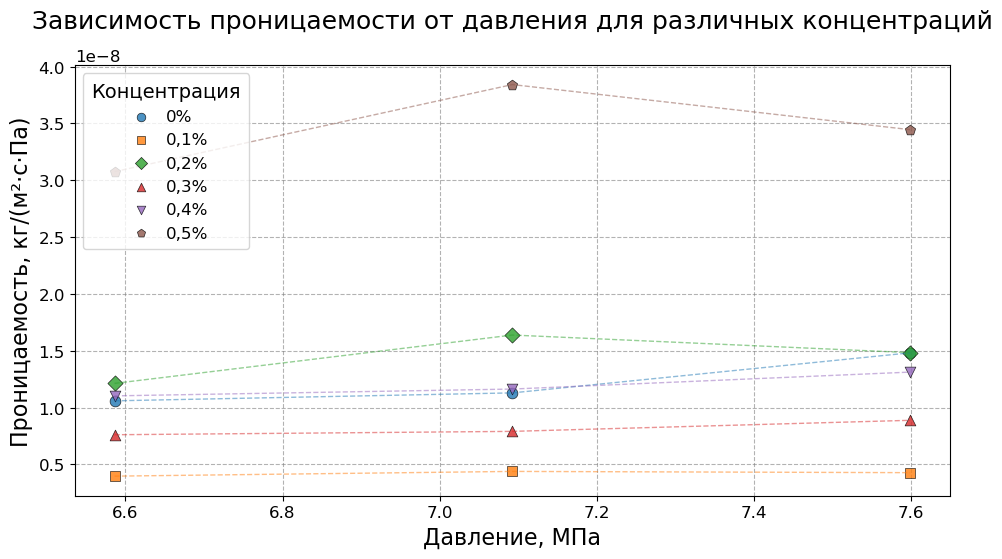

In [17]:
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', 'P', 'h', '8', 'd']

# Настройки стиля
plt.figure(figsize=(10, 6))

# Построение графика для каждой концентрации
for i, concentration in enumerate(K_P_values):
    float_value = float(concentration.replace('%', '').replace(',', '.'))
    # Получаем текущий цвет из цикла
    
    
    # Создаем датафрейм для текущей концентрации
    df = K_P_values[concentration][0][K_P_values[concentration][0].index % 5 == 0]
    x_values = df['P'] * 101325 / 10**6
    y_values = df['K']
    
    # Линии (добавляем сначала, чтобы они были под точками)
    plt.plot(
        x_values,
        y_values,
        linestyle='--',
        linewidth=1,
        alpha=0.5,
        color=color
    )
    
    # Точки (сохраняем оригинальные параметры)
    sns.scatterplot(
        y=y_values, 
        x=x_values,
        data=df,
        label=f'{concentration}',
        marker=markers[i % len(markers)],
        s=60,
        edgecolor='black',
        linewidth=0.5,
        alpha=0.8,
        color=color  # Используем тот же цвет, что и для линии
    )

# Настройки графика (оставляем без изменений)
plt.title('Зависимость проницаемости от давления для различных концентраций', pad=15)
plt.xlabel('Давление, МПа')
plt.ylabel('Проницаемость, кг/(м²⋅с⋅Па)')

# Легенда (без изменений)
plt.legend(
    title='Концентрация',
    title_fontsize='14',
    fontsize='12',
    loc='upper left',
    frameon=True,
    framealpha=0.8,
    borderpad=0.5,
    handletextpad=0.5,
    markerscale=0.8
)

plt.tight_layout()
plt.savefig('permeability_vs_pressure_via_conc.png', bbox_inches='tight', dpi=300)
plt.show()

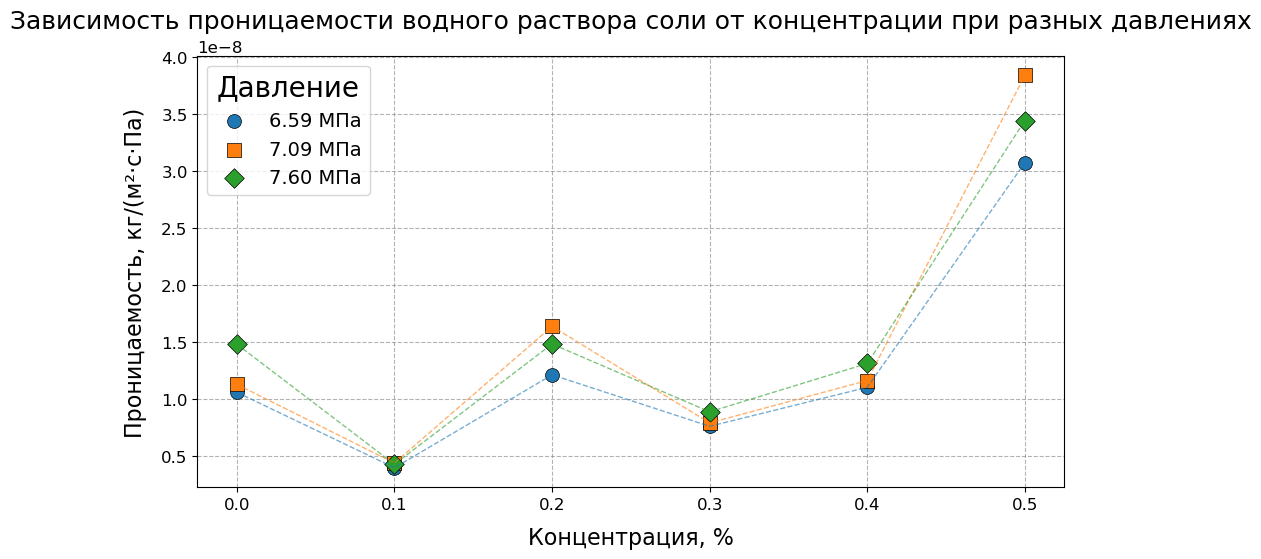

In [20]:
K_P = pd.DataFrame()
K_P['P'] = K_P_values['0%'][0]['P']
concentration_list = []

# Собираем данные по концентрациям
for concentration in K_P_values:
    float_concentration = float(concentration.replace('%', '').replace(',', '.'))
    concentration_list.append(float_concentration)
    K_P[float_concentration] = K_P_values[concentration][0]['K']

P_values = K_P['P'].to_list()

# Настройки стиля
plt.figure(figsize=(10, 6))
#sns.set_style("whitegrid")

# Список маркеров для разных давлений
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', 'P', 'h']

# Цветовая палитра

for i, pressure in enumerate(P_values[::5]):
    y_values = K_P[K_P['P'] == pressure][concentration_list].values.flatten()
    
    # Получаем цвет из палитры
    color = plt.gca()._get_lines.get_next_color()
    
    # Добавляем пунктирные линии (рисуем сначала, чтобы они были под точками)
    plt.plot(
        concentration_list, 
        y_values,
        linestyle='--',
        linewidth=1,
        alpha=0.6,
        color=color
    )
    
    # Строим график с уникальным маркером для каждого давления (оригинальный код)
    sns.scatterplot(
        x=concentration_list, 
        y=y_values,
        label=f'{pressure * 101325 / 10**6:.2f} МПа',
        marker=markers[i % len(markers)],
        s=100,
        edgecolor='black',
        linewidth=0.5,
        color=color  # Используем тот же цвет, что и для линии
    )

# Настройки оформления (без изменений)
plt.title('Зависимость проницаемости водного раствора соли от концентрации при разных давлениях', pad=20)
plt.xlabel('Концентрация, %', labelpad=10)
plt.ylabel('Проницаемость, кг/(м²·с·Па)', labelpad=10)

# Легенда с настройками (без изменений)
plt.legend(
    title='Давление',
    loc='upper left'
)

# Оптимизация расположения
plt.tight_layout()

# Сохранение
plt.savefig('permeability_vs_concentration_salt.png', bbox_inches='tight', dpi=300)
plt.show()

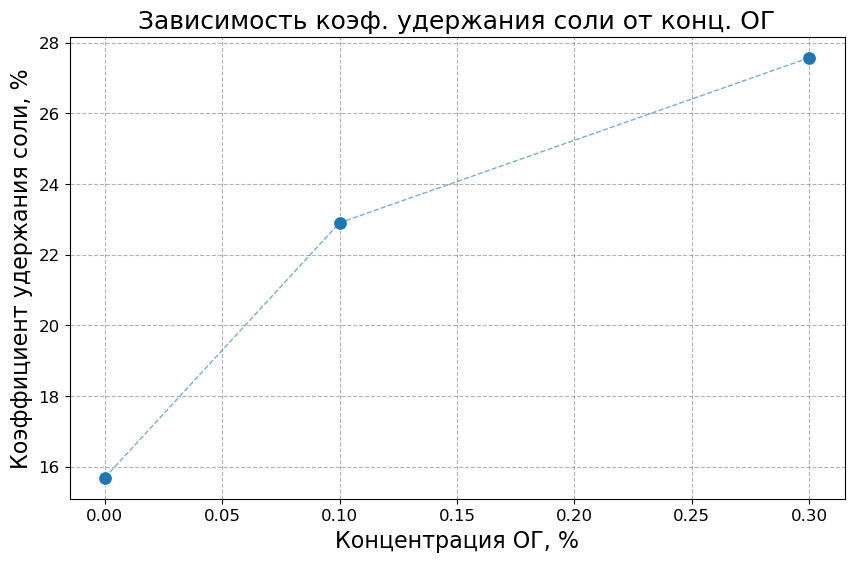

In [25]:
data = {
    'C': [0, 0.1, 0.3],
    'R': [15.69188509, 22.90259815, 27.57239327]
}

df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))

# Сначала рисуем пунктирные линии (чтобы они были под точками)
plt.plot(
    df['C'], 
    df['R'], 
    linestyle='--', 
    linewidth=1, 
    alpha=0.6,
    color='tab:blue'  # Используем стандартный синий цвет seaborn
)

# Затем точки (оригинальный код без изменений)
sns.scatterplot(
    data=df, 
    x='C', 
    y='R',
    s=100,
    color='tab:blue'  # Сохраняем цвет точек как в оригинале
)

# Остальные параметры графика без изменений
plt.xlabel('Концентрация ОГ, %')
plt.ylabel('Коэффициент удержания соли, %')
plt.title('Зависимость коэф. удержания соли от конц. ОГ')

plt.show()

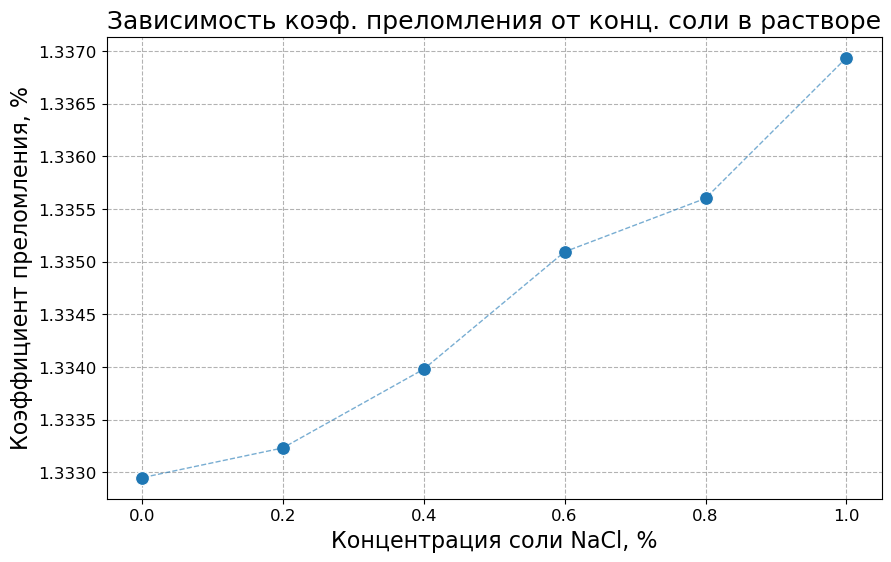

In [24]:
data = {
    'n': [1.336938, 1.335602, 1.335094, 1.333979, 1.333231, 1.332948],
    'C': [1, 0.8, 0.6, 0.4, 0.2, 0]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# Сначала рисуем пунктирные линии (чтобы они были под точками)
plt.plot(
    df['C'], 
    df['n'], 
    linestyle='--', 
    linewidth=1, 
    alpha=0.6,
    color='tab:blue'  # Используем стандартный синий цвет seaborn
)

# Затем точки (оригинальный код без изменений)
sns.scatterplot(
    data=df, 
    x='C', 
    y='n',
    s=100,
    color='tab:blue'  # Сохраняем цвет точек как в оригинале
)

# Остальные параметры графика без изменений
plt.xlabel('Концентрация соли NaCl, %')
plt.ylabel('Коэффициент преломления, %')
plt.title('Зависимость коэф. преломления от конц. соли в растворе')

plt.show()